In [91]:
import numpy as np
import matplotlib.pylab as plt
import random

In [92]:
from PIL import Image, ImageFilter
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.ndimage.filters import generic_filter

(485, 863, 3)


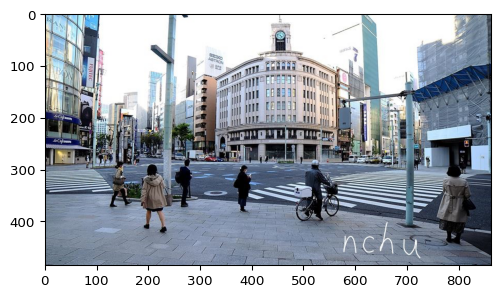

In [93]:
im = imread('./myImg.jpg')

plt.figure(num=None, figsize=(6, 6), dpi=96)
plt.imshow(im,cmap='gray')

print(im.shape)

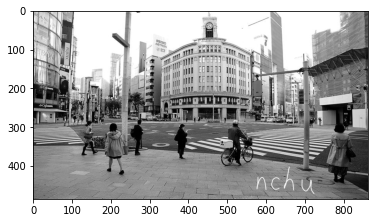

In [94]:
r_scaled = rescale(im[:,:,0], 1)
g_scaled = rescale(im[:,:,1], 1)
b_scaled = rescale(im[:,:,2], 1)
im_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)
im_gray = rescale(rgb2gray(im), 1) 
plt.imshow(im_gray,cmap='gray')
#print(im_gray.shape[1])
#print(im_gray)

In [95]:
def addSp(img):
    output = np.zeros(img.shape)
    thres = 1 - 0.25
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rdn = random.random()
            if rdn < 0.25:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = img[i][j]
    return output



In [96]:
def to255(img):
  output = np.zeros(img.shape)
  for i in range(img.shape[0]):
        for j in range(img.shape[1]):
          output[i][j] = img[i][j]*255
        
  return output

In [97]:
def to1(img):
  output = np.zeros(img.shape)
  for i in range(img.shape[0]):
        for j in range(img.shape[1]):
          output[i][j] = img[i][j]/255
        
  return output

In [98]:
im_gray255 = to255(im_gray)
#plt.imshow(im_gray255,cmap='gray')

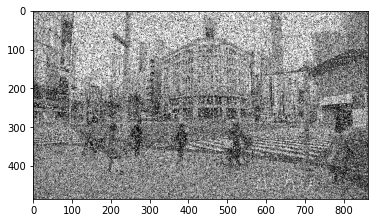

In [99]:
im_addN = addSp(im_gray255)
#print(im_addN[15,1])
plt.imshow(im_addN,cmap='gray')

In [100]:
def padding(img,pad):
    padded_img = np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad))
    padded_img[pad:-pad,pad:-pad] = img
    return padded_img

In [101]:
def findMed(window):
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)
    return Zmin, Zmed, Zmax

In [102]:
def AandB(arr,i,j,s,smax):
  window = arr[i-(s//2):i+(s//2)+1,j-(s//2):j+(s//2)+1]
  #print(window)
  x,y = window.shape
  #print("x=",x)
  Zmin,Zmed,Zmax = findMed(window)
  #print(window[5])
  Zxy=window[x//2,y//2]
  #print(Zmin,Zmed,Zmax)
  A1=Zmed-Zmin
  A2=Zmed-Zmax
  B1=Zxy-Zmin
  B2=Zxy-Zmax
  #print(A1,A2,B1,B2)
  if (A1>0 and A2<0) :    #goto B
    if (B1>0 and B2<0):   #B
      return Zxy
    else:
      return Zmed              
  else:   #Zmed==Zmin or Zmed==Zmax怕是細節故放大檢驗
    s+=2
    if(s<=smax):
      #nwindow=np.reshape(window, (-1, s))
      #print(nwindow)
      return AandB(arr,i,j,s,smax)
    else:
      return Zxy




In [103]:
def amf(img,window=3):
  maxWin = 7
  x,y = img.shape
  #print(x,y)
  a = maxWin//2
  img_padded = padding(img,a)
  #plt.imshow(img_padded,cmap='gray')
  output = np.zeros(img_padded.shape)
  for i in range(a,x+a+1):
    #print("i=",i)
    for j in range(a,y+a+1):
      #print("j=",j)
      output[i,j]=AandB(img_padded,i,j,window,maxWin)

  return output



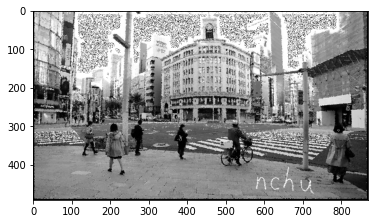

In [105]:
myOut = amf(im_addN)
myresult = to1(myOut)
plt.imshow(myresult,cmap='gray')